In [ ]:
#python -m pip install opencv3

In [1]:
import cv2
import numpy as np

from matplotlib import pyplot as plt

%matplotlib inline


import os

from IPython.display import clear_output

%matplotlib inline

### face detection

- scaleFactor – Parameter specifying how much the image size is reduced at each image scale.


- min_neighbors-Parameter specifying how many neighbors each candidate rectangle should have to retain it.


- minSize – Minimum possible object size. Objects smaller than that are ignored.


- maxSize – Maximum possible object size. Objects larger than that are ignored.

In [4]:

faceDetect=cv2.CascadeClassifier('xml/frontal_face.xml')
cam = cv2.VideoCapture(1)

cv2.namedWindow("Face", cv2.WINDOW_AUTOSIZE)

while True:
    ret,img = cam.read()
    gray = cv2.cvtColor(img,cv2.COLOR_BGRA2GRAY)
    faces = faceDetect.detectMultiScale(gray,scaleFactor=1.3,minNeighbors=3)

    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)

    
    cv2.imshow("Face",img)
    if (cv2.waitKey(10)== ord('q')):
        break

cam.release()
cv2.destroyAllWindows()

#scaleFactor – Parameter specifying how much the image size is reduced at each image scale.
#min_neighbors-Parameter specifying how many neighbors each candidate rectangle should have to retain it.
#minSize – Minimum possible object size. Objects smaller than that are ignored.
#maxSize – Maximum possible object size. Objects larger than that are ignored.

error: OpenCV(3.4.1) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:11147: error: (-215) scn == 3 || scn == 4 in function cv::cvtColor


<h2 align="center" style='color: #be2830'>Build Our Dataset</h2>
<h4 align="center">
Detect $\rightarrow$ Cut $\rightarrow$ Normalize $\rightarrow$ Resize $\rightarrow$ Save</h4>

### detect face

In [5]:

def detect_face(frame):
    detector = cv2.CascadeClassifier("xml/frontal_face.xml")

    
    #faces = detector.detectMultiScale(frame,scaleFactor=1.3,minNeighbors=5)
    scale_factor = 1.2
    min_neighbors =5
    min_size = (30,30)
    flags = cv2.CASCADE_SCALE_IMAGE

    faces = detector.detectMultiScale(frame,scaleFactor=scale_factor,
                                     minNeighbors=min_neighbors,
                                     minSize=min_size,
                                     flags=flags)
    
    return faces

### cut face

In [6]:
def cut_faces(image, faces_coord):
    faces = []
      
    for (x, y, w, h) in faces_coord:
        #w_rm = int(0.2 * w / 2)
        faces.append(image[y: y + h, x : x + w ])
         
    return faces

### normalize faces by increasing pixel intensity(brightness)

In [7]:
def normalize_intensity(images):
    images_norm = []
    for image in images:
        is_color = len(image.shape) == 3 
        if is_color:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        images_norm.append(cv2.equalizeHist(image))
    return images_norm

### Resize face

 ### cv.INTER_AREA for shrinking & cv.INTER_CUBIC for zooming

In [8]:
def resize(images,size=(47,62)):
    image_resize = []
    
    for image in images:
        if image.shape < size:
            img_size = cv2.resize(image,size,interpolation=cv2.INTER_CUBIC)
        else:
            img_size = cv2.resize(image,size,interpolation=cv2.INTER_AREA)
        image_resize.append(img_size)
        
    return image_resize



### make pipeline

In [9]:
def normalize_faces(frame, faces_coord):
    faces = cut_faces(frame, faces_coord)
    faces = normalize_intensity(faces)
    
    faces = resize(faces)
    return faces

In [10]:
def plot_show(image,title=""):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    plt.axis("off")
    plt.title(title)
    plt.imshow(image,cmap="Greys_r")
    plt.show()

In [14]:
def draw_rectangle(image, coords):
    for (x, y, w, h) in coords:
        #w_rm = int(0.2 * w / 2) 
        cv2.rectangle(image, (x , y), (x + w , y + h), (0,0,255),2)

In [15]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from IPython.display import clear_output

%matplotlib inline

cam = cv2.VideoCapture(1)
#cv2.namedWindow("Face", cv2.WINDOW_AUTOSIZE)
folder = "people/"+input('Person:').lower()


if not os.path.exists(folder):
    os.mkdir(folder)
    
    flag_start_capturing = False
    sample=1
    #cam = cv2.VideoCapture(0)
    cv2.namedWindow("Face", cv2.WINDOW_AUTOSIZE)

    while True:
        ret,frame = cam.read()
        
        
        
        faces_coord = detect_face(frame)

        if len(faces_coord):
            faces = normalize_faces(frame,faces_coord)
            #faces = normalize_intensity(faces)
            cv2.imwrite(folder + '/' + str(sample)+'.jpg',faces[0])
            plot_show(faces[0],"Image saved:"+str(sample))
            clear_output(wait=True)
            
        draw_rectangle(frame,faces_coord)
        cv2.imshow('Face',frame)
        keypress=cv2.waitKey(1)
        
        if keypress == ord('c'):
            
            if flag_start_capturing == False:
                flag_start_capturing = True
            else:
                flag_start_capturing = False
                sample = 0
        
        if flag_start_capturing == True:
            sample += 1
        if sample >15:
            break

    cam.release()
    cv2.destroyAllWindows()
else:
    print ("This name already exists.")

Person:abc


error: OpenCV(3.4.1) C:\projects\opencv-python\opencv\modules\highgui\src\window.cpp:356: error: (-215) size.width>0 && size.height>0 in function cv::imshow


In [13]:
cam.release()

In [ ]:
### datasets for other class

basepath = 'C:\\Users\\Vineet\\scikit_learn_data\\lfw_home\\lfw_funneled\\'
#C:\Users\Vineet\scikit_learn_data\lfw_home
images = os.listdir(basepath) 
print (len(images))
data = images[:210]

for i,folder in enumerate(data,start=1):
    
    files=os.listdir(basepath+'\\'+folder)
    for k,img in enumerate(files,start=1):
        if img.endswith('.jpg'):
            #print img
            frame=cv2.imread(basepath+'\\'+folder+'\\'+img,0)
        #print frame
       
            faces_coord = detect_face(frame)
            if len(faces_coord):
                faces = cut_faces(frame, faces_coord)
                #print faces
                faces = normalize_intensity(faces)
                faces = resize(faces)
                cv2.imwrite('people/unknown/' + str(i)+'.jpg',faces[0])
                
                break

### collect datasets

In [9]:
def collect_dataset():
    images = []
    labels = []
    labels_dic = {}
    #people = [person for person in os.listdir("Male_female/")]
    people = [person for person in os.listdir("people/")]
    #people = [person for person in os.listdir("people/")]
    for i, person in enumerate(people):
        labels_dic[i] = person
        for image in os.listdir("people/" + person):
            if image.endswith('.jpg'):
                images.append(cv2.imread("people/" + person + '/' + image, 0))
                labels.append(i)
    return (images, np.array(labels), labels_dic)

In [10]:
images, labels, labels_dic = collect_dataset()

In [11]:
print (len(images))
print (labels_dic)

385
{0: 'unknown', 1: 'vineet'}


In [12]:
X_train=np.asarray(images)

In [13]:
X_train.shape

(385, 62, 47)

In [14]:
train=X_train.reshape(len(X_train),-1)

In [15]:
train.shape

(385, 2914)

In [16]:
from sklearn.decomposition import PCA

Text(0,0.5,'cumulative explained variance')

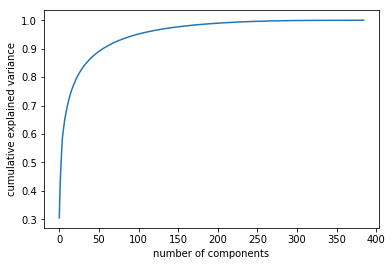

In [17]:
pca1 = PCA()
pca1.fit(train)
plt.plot(np.cumsum(pca1.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [18]:
pca1 = PCA(n_components=.99)
new_train=pca1.fit_transform(train)

In [19]:
pca1.n_components_

203

In [20]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,KFold

In [21]:
param_grid = {'C':[.0001,.001,.01,.1,1,10]}

In [22]:
kf=KFold(n_splits=5,shuffle=True)

In [23]:
gs_svc = GridSearchCV(SVC(kernel='linear',probability=True),param_grid=param_grid,cv=kf,scoring='accuracy')

In [24]:
gs_svc.fit(new_train,labels)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [25]:
gs_svc.best_score_

0.987012987012987

In [26]:
gs_svc.best_params_

{'C': 0.0001}

In [28]:
svc1 = gs_svc.best_estimator_

In [29]:
import pickle

filename = 'svc_face.pkl'
f=open(filename, 'wb')
pickle.dump(svc1,f)
 

f.close()


In [30]:
import pickle

filename = 'svc_face.pkl'
svc1 = pickle.load(open(filename, 'rb'))

In [37]:
cam = cv2.VideoCapture(1)
font=cv2.FONT_HERSHEY_PLAIN
cv2.namedWindow("opencv_face", cv2.WINDOW_AUTOSIZE)



while True:
    ret,frame = cam.read()
    
    
    faces_coord = detect_face(frame) # detect more than one face
    if len(faces_coord):
        faces = normalize_faces(frame, faces_coord)
        #faces = normalize_intensity(faces)
        for i, face in enumerate(faces): # for each detected face
            
            
            #cv2.imwrite('trainingData/female/picture_BGR5.jpg',face)
            test = pca1.transform(face.reshape(1,-1))    
            #print test
            #transform = test.reshape(1,-1)
            #print transform
            prob=svc1.predict_proba(test)
            confidence = svc1.decision_function(test)
            print (confidence)
            print (prob)
           
            
            
            pred = svc1.predict(test)
            print (pred,pred[0])
           
            name=labels_dic[pred[0]].capitalize()
            print (name)
            
            #pred = labels_dic[pred[0]].capitalize()
            #threshold = .50
            
            if prob[0][1]>.75:
                
                cv2.putText(frame, 'vineet',(faces_coord[i][0], faces_coord[i][1] - 10),
                            cv2.FONT_HERSHEY_PLAIN, 2, (66, 53, 243), 2)
            
                
            elif prob[0][0]>.80:
                cv2.putText(frame,'unknown',(faces_coord[i][0], faces_coord[i][1] - 10),
                            cv2.FONT_HERSHEY_PLAIN, 3, (66, 53, 243), 2)
                
                
            #cv2.putText(frame,name,(x,y-10),font,2,(0,0,255),2,cv2.LINE_AA)
            
               
           #cv2.putText(frame,'Unknown',(x,y-10),font,2,(0,0,255),2,cv2.LINE_AA)
        clear_output(wait = True)
        draw_rectangle(frame, faces_coord) # rectangle around face
        
    cv2.putText(frame, "ESC to exit", (5, frame.shape[0] - 5),cv2.FONT_HERSHEY_PLAIN, 1.3, (66, 53, 243), 2,
                cv2.LINE_AA)
    
    cv2.imshow("opencv_face", frame) # live feed in external
    if cv2.waitKey(5) == 27:
        break
        
cam.release()
cv2.destroyAllWindows()
        

[-0.12804468]
[[0.71928299 0.28071701]]
[0] 0
Unknown
[-1.88523838]
[[9.99631129e-01 3.68870999e-04]]
[0] 0
Unknown
[-2.75616328]
[[9.9998831e-01 1.1690492e-05]]
[0] 0
Unknown
